In [87]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit

from google.colab import drive


In [2]:
from google.colab import files
# use df_zipcode.csv for this analysis
uploaded = files.upload()

Saving df_zipcode.csv to df_zipcode.csv


In [149]:
import io
df = pd.read_csv(io.BytesIO(uploaded['df_zipcode.csv']))

In [150]:
df.describe()

,sale_price,latitude,longitude,land_val,imp_val,year_built,sqft_lot,sqft,grade,fbsmt_grade,...,view_rainier,view_olympics,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,year,zipcode
count,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,...,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00,24938.00
mean,1064284.58,47.63,-122.34,487012.55,487310.74,1942.58,6001.87,1902.27,7.32,4.09,...,0.02,0.12,0.11,0.40,0.04,0.13,0.10,0.02,2020.05,98124.55
std,660373.89,0.07,0.04,344108.94,347250.79,27.60,3656.75,852.55,1.04,3.41,...,0.24,0.56,0.53,0.95,0.32,0.57,0.51,0.20,1.36,23.92
min,65000.00,47.50,-122.42,0.00,0.00,1900.00,773.00,260.00,3.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2018.00,98015.00
25%,699000.00,47.56,-122.38,291000.00,279000.00,1922.00,4200.00,1290.00,7.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2019.00,98112.00
50%,890000.00,47.64,-122.34,432000.00,427000.00,1941.00,5355.00,1780.00,7.00,6.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98117.00
75%,1250000.00,47.68,-122.30,605000.00,606000.00,1953.00,6960.00,2340.00,8.00,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,98126.00
max,14850000.00,47.73,-122.24,7560000.00,7946000.00,2022.00,155267.00,12280.00,13.00,13.00,...,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2022.00,98199.00


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24938 entries, 0 to 24937
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_date         24938 non-null  object 
 1   sale_price        24938 non-null  int64  
 2   latitude          24938 non-null  float64
 3   longitude         24938 non-null  float64
 4   city              24938 non-null  object 
 5   zoning            24938 non-null  object 
 6   land_val          24938 non-null  int64  
 7   imp_val           24938 non-null  int64  
 8   year_built        24938 non-null  int64  
 9   sqft_lot          24938 non-null  int64  
 10  sqft              24938 non-null  int64  
 11  grade             24938 non-null  int64  
 12  fbsmt_grade       24938 non-null  int64  
 13  home_condition    24938 non-null  int64  
 14  stories           24938 non-null  float64
 15  beds              24938 non-null  int64  
 16  bath_full         24938 non-null  int64 

In [152]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_month'] = df['sale_date'].dt.month
df['sale_day'] = df['sale_date'].dt.day
df.rename(columns={'year': 'sale_year'}, inplace=True)
df.head()

,sale_date,sale_price,latitude,longitude,city,zoning,land_val,imp_val,year_built,sqft_lot,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
0,2018-01-02,665000,47.56,-122.32,SEATTLE,SF 5000,41000,122000,1920,2525,...,0,0,0,0,0,0,2018,98108,1,2
1,2018-01-09,499000,47.52,-122.32,SEATTLE,SF 5000,29000,55000,1907,6000,...,0,0,0,0,0,0,2018,98108,1,9
2,2018-02-14,675000,47.62,-122.30,SEATTLE,SF 5000,97000,132000,1908,5286,...,2,0,0,0,0,0,2018,98112,2,14
3,2018-02-13,1150000,47.72,-122.34,SEATTLE,SF 7200,440000,221000,1920,47916,...,0,0,0,0,0,4,2018,98133,2,13
4,2018-02-14,705000,47.67,-122.32,SEATTLE,SF 5000,81000,72000,1918,3825,...,0,0,0,0,0,0,2018,98105,2,14


In [153]:
# assign number values to zoning data for single family homes
df['zoning'].value_counts()
category_mapping = {
    'NR3': 1,
    'NR2': 2,
    'SF 5000': 3,
    'RSL (M)': 4,
    'SF 7200': 5,
    'NR1': 6,
    'SF 9600': 7
}

# Replace categorical values with integer values using the mapping
df['zoning'] = df['zoning'].map(category_mapping)
df['zoning'].value_counts()

1    16716
2     4014
3     2191
4     1293
5      360
6      313
7       51
Name: zoning, dtype: int64

In [155]:
# Specify the column to exclude from the subset
column_to_exclude = 'sale_date'

# Create a subset of columns by excluding the specified column
subset_columns = [col for col in df.columns if col != column_to_exclude]

# Create a new DataFrame with the subset of columns
df_subset = df[subset_columns]

# Remove duplicate rows based on the subset of columns
df_no_duplicates = df_subset.drop_duplicates()
df = df_no_duplicates
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24868 entries, 0 to 24937
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_price        24868 non-null  int64  
 1   latitude          24868 non-null  float64
 2   longitude         24868 non-null  float64
 3   city              24868 non-null  object 
 4   zoning            24868 non-null  int64  
 5   land_val          24868 non-null  int64  
 6   imp_val           24868 non-null  int64  
 7   year_built        24868 non-null  int64  
 8   sqft_lot          24868 non-null  int64  
 9   sqft              24868 non-null  int64  
 10  grade             24868 non-null  int64  
 11  fbsmt_grade       24868 non-null  int64  
 12  home_condition    24868 non-null  int64  
 13  stories           24868 non-null  float64
 14  beds              24868 non-null  int64  
 15  bath_full         24868 non-null  int64  
 16  bath_3qtr         24868 non-null  int64 

In [171]:
# reduce data set to just 2020 - 2022 to see if it provides better fit
df_2020 = df[~df['sale_year'].isin([2018,2019])]
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726 entries, 135 to 24937
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_price        15726 non-null  int64  
 1   latitude          15726 non-null  float64
 2   longitude         15726 non-null  float64
 3   city              15726 non-null  object 
 4   zoning            15726 non-null  int64  
 5   land_val          15726 non-null  int64  
 6   imp_val           15726 non-null  int64  
 7   year_built        15726 non-null  int64  
 8   sqft_lot          15726 non-null  int64  
 9   sqft              15726 non-null  int64  
 10  grade             15726 non-null  int64  
 11  fbsmt_grade       15726 non-null  int64  
 12  home_condition    15726 non-null  int64  
 13  stories           15726 non-null  float64
 14  beds              15726 non-null  int64  
 15  bath_full         15726 non-null  int64  
 16  bath_3qtr         15726 non-null  int6

In [172]:
# drop none numerical data
drop_columns = ['city']
df_2020 = df_2020.drop(columns = drop_columns)

df_2020['sale_year'].value_counts()

2021    6049
2020    5280
2022    4397
Name: sale_year, dtype: int64

In [173]:
df_2020.describe()

,sale_price,latitude,longitude,zoning,land_val,imp_val,year_built,sqft_lot,sqft,grade,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
count,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,...,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00,15726.00
mean,1137275.19,47.63,-122.34,1.62,488666.60,486302.23,1942.34,5967.26,1901.63,7.33,...,0.11,0.40,0.04,0.13,0.09,0.02,2020.94,98124.61,6.65,15.58
std,696295.98,0.07,0.04,1.10,341106.85,347664.52,27.58,3660.35,856.69,1.03,...,0.52,0.94,0.33,0.57,0.49,0.21,0.78,24.03,3.09,8.75
min,100000.00,47.50,-122.42,1.00,0.00,0.00,1900.00,823.00,260.00,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98015.00,1.00,1.00
25%,745000.00,47.56,-122.38,1.00,292000.00,278250.00,1922.00,4200.00,1290.00,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2020.00,98112.00,4.00,8.00
50%,949400.00,47.64,-122.34,1.00,433000.00,426000.00,1941.00,5346.00,1780.00,7.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2021.00,98117.00,7.00,16.00
75%,1325000.00,47.68,-122.30,2.00,609000.00,605000.00,1953.00,6915.75,2340.00,8.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,98126.00,9.00,23.00
max,14850000.00,47.73,-122.24,7.00,6907000.00,7294000.00,2022.00,155267.00,12280.00,13.00,...,4.00,4.00,4.00,4.00,4.00,4.00,2022.00,98199.00,12.00,31.00


# gb_model = GradientBoostingRegressor

Gradient Boosting Regressor is a machine learning algorithm that belongs to the family of ensemble methods. It's specifically designed for regression tasks, where the goal is to predict a continuous numeric output variable.

Ensemble methods combine the predictions of multiple base models (usually weak learners) to create a stronger, more accurate final prediction. Gradient Boosting Regressor, in particular, works by sequentially adding weak learners to the ensemble in a way that each new learner corrects the errors made by the previous ones.

Here's how Gradient Boosting Regressor works:

* Initialization: The algorithm starts with an initial prediction that is often the mean of the target variable. This initial prediction is then improved iteratively.

* Fitting Weak Learners: A series of weak regression models (usually decision trees) are sequentially fit to the dataset. Each new model is trained to minimize the residual errors (the differences between the current predictions and the actual target values) of the ensemble so far.

* Gradient Descent: In each iteration, the algorithm calculates the gradient of the loss function with respect to the current ensemble's predictions. The new model is trained to minimize this gradient, effectively reducing the residual errors.

* Weighted Combination: The predictions from the newly added model are combined with the predictions from the previous models, with each model's contribution weighted by a learning rate (a small positive value less than 1). This process adjusts the ensemble's predictions in the direction that reduces the errors.

* Iterative Process: Steps 2-4 are repeated for a predefined number of iterations (or until convergence) to build a sequence of models, each focused on correcting the mistakes of the previous ones.

* Final Prediction: The final prediction is the weighted sum of the predictions from all the models in the ensemble.

Gradient Boosting Regressor is a powerful algorithm known for its high predictive accuracy. However, it can be prone to overfitting if not properly tuned. Hyperparameters like the number of iterations (trees), the learning rate, and the depth of the individual trees play a crucial role in achieving optimal results and avoiding overfitting. Cross-validation and hyperparameter tuning are important steps in using Gradient Boosting Regressor effectively.

# All features - 2020 to 2022


In [174]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y = df_2020['sale_price']

# establish features for specific bin
X = df_2020.copy()
X.drop(columns=['sale_price'], axis=1, inplace=True)
X.head()

,latitude,longitude,zoning,land_val,imp_val,year_built,sqft_lot,sqft,grade,fbsmt_grade,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
135,47.70,-122.32,3,80000,59000,1949,5940,740,6,0,...,0,0,0,0,0,0,2020,98125,1,3
136,47.71,-122.31,5,61000,105000,1947,8480,2570,7,0,...,0,0,0,0,0,0,2020,98125,1,22
137,47.67,-122.33,3,104000,87000,1901,6120,1200,6,0,...,0,0,0,0,0,0,2020,98115,1,22
138,47.57,-122.41,3,136000,70000,1941,7089,930,7,0,...,0,0,0,0,0,0,2020,98116,2,11
139,47.53,-122.32,3,19400,34700,1907,6000,950,6,0,...,0,0,0,0,0,0,2020,98108,2,21


In [175]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler
X_scaler = scaler.fit(X_train)

# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and train a GradientBoostingRegressor
gb_model = ensemble.GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)


# Fit model with training data
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [176]:
# predict prices
y_pred = gb_model.predict(X_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y_test, y_pred)

absolute_diff = np.abs(y_test - y_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
13329        810000        739805.37             70194.63
16534        600000        597760.93              2239.07
20185        875000        925329.33             50329.33
17441       1015000        830179.80            184820.20
223          993000        869722.35            123277.65
...             ...              ...                  ...
10731       1015000       1113236.98             98236.98
18017       1655000       1457836.86            197163.14
24521       1550000       1605676.09             55676.09
2566         820000        999958.84            179958.84
22767       1165000       1154943.11             10056.89

[3146 rows x 3 columns]
Root Mean Squared Error: 286217.35
R-squared: 0.8318688455560798


In [177]:
# Random Forests in sklearn will automatically calculate feature importance
importances = gb_model.feature_importances_
# We can sort the features by their importance
sorted(zip(gb_model.feature_importances_, X.columns), reverse=True)

[(0.268322656991308, 'land_val'),
 (0.17633028585584012, 'grade'),
 (0.11525805929410331, 'sqft'),
 (0.11266611337040959, 'imp_val'),
 (0.11045000686626939, 'latitude'),
 (0.07171585412219304, 'zoning'),
 (0.029064242685512807, 'sale_year'),
 (0.028862616596606633, 'wfnt'),
 (0.015458161887936158, 'longitude'),
 (0.010400397067264307, 'zipcode'),
 (0.00946070211868413, 'view_sound'),
 (0.008874322305196981, 'view_lakewash'),
 (0.008690166587335554, 'sqft_lot'),
 (0.008231846611076508, 'view_cascades'),
 (0.005301110112014514, 'sale_month'),
 (0.0037822831680249737, 'home_condition'),
 (0.0037564227026208995, 'year_built'),
 (0.0023815662916505742, 'view_skyline'),
 (0.002123228893579372, 'view_territorial'),
 (0.0017806823154904313, 'fbsmt_grade'),
 (0.0016650845770474275, 'sale_day'),
 (0.0015717667751038035, 'noise_traffic'),
 (0.0007405229961801043, 'gara_sqft'),
 (0.0006383109976772639, 'bath_full'),
 (0.0005426275700966187, 'beds'),
 (0.000468180602552095, 'stories'),
 (0.00046699

<Axes: title={'center': 'Top 15 - Features Importances'}, ylabel='1'>

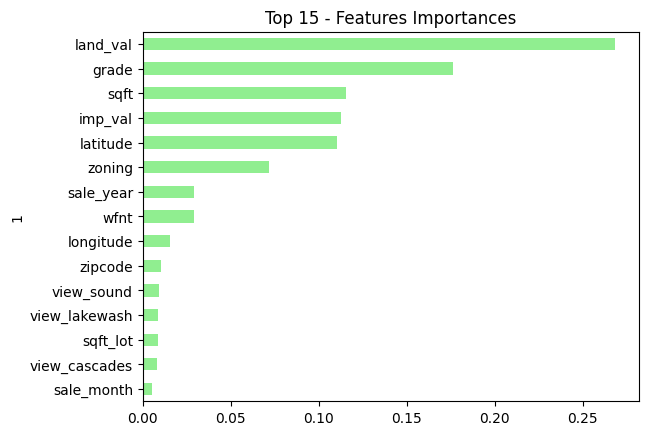

In [178]:
# Visualize the features by importance

importances_df = pd.DataFrame(sorted(zip(gb_model.feature_importances_, X.columns), reverse=True))
importances_df = importances_df.head(15)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Top 15 - Features Importances', legend=False)

#2020 - 2022, Dropped 'land_val' & 'imp_val'

###Repeat without 'land_val', land value and 'imp_val' improvements value (typically structures on property) due to high correlation with sales price.

In [235]:
# dropped land_val & imp_val due to very strong correlation with sales price
df_2020_noLand = df.drop(columns=['city','land_val','imp_val'])

In [236]:
# define y for specific price bin
# filtered_df1 =  0− 500k
y = df_2020_noLand['sale_price']

# establish features for specific bin
X = df_2020_noLand.copy()
X.drop(columns=['sale_price'], axis=1, inplace=True)
X.head()

,latitude,longitude,zoning,year_built,sqft_lot,sqft,grade,fbsmt_grade,home_condition,stories,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
0,47.56,-122.32,3,1920,2525,1570,6,4,4,1.50,...,0,0,0,0,0,0,2018,98108,1,2
1,47.52,-122.32,3,1907,6000,1350,5,0,3,1.50,...,0,0,0,0,0,0,2018,98108,1,9
2,47.62,-122.30,3,1908,5286,1800,7,5,4,1.00,...,2,0,0,0,0,0,2018,98112,2,14
3,47.72,-122.34,5,1920,47916,1590,7,0,3,1.50,...,0,0,0,0,0,4,2018,98133,2,13
4,47.67,-122.32,3,1918,3825,780,6,0,3,1.00,...,0,0,0,0,0,0,2018,98105,2,14


In [237]:
# initiate scaler
scaler = StandardScaler()

#split, and fit train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler
X_scaler = scaler.fit(X_train)

# scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and train a GradientBoostingRegressor
gb_model = ensemble.GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, min_samples_split = 10, min_samples_leaf = 5, random_state=42)


# Fit model with training data
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(min_samples_leaf=5, min_samples_split=10,
                          n_estimators=200, random_state=42)

In [238]:
# predict prices
y_pred = gb_model.predict(X_test_scaled)

#format numbers with 2 decimals places
pd.options.display.float_format = '{:.2f}'.format


mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),2)
r2 = r2_score(y_test, y_pred)

absolute_diff = np.abs(y_test - y_pred)

#Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Absolute Difference': absolute_diff
})

# Print the comparison DataFrame
print(comparison_df)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

       Actual Price  Predicted Price  Absolute Difference
16254        665000        741871.98             76871.98
11496        660000        588029.68             71970.32
8658         580000        709433.35            129433.35
18565        930000        875836.41             54163.59
6147         819000        827970.83              8970.83
...             ...              ...                  ...
22138       1107000       1109913.68              2913.68
5940         764750        700862.12             63887.88
16607       1200000       1008310.07            191689.93
24204        420000        373301.85             46698.15
4080         940000        999874.14             59874.14

[4974 rows x 3 columns]
Root Mean Squared Error: 403254.23
R-squared: 0.6910049220066778


In [239]:
# Random Forests in sklearn will automatically calculate feature importance
importances = gb_model.feature_importances_
# We can sort the features by their importance
sorted(zip(gb_model.feature_importances_, X.columns), reverse=True)

[(0.28464970520150806, 'grade'),
 (0.24673474731637446, 'sqft'),
 (0.12287816254133216, 'latitude'),
 (0.0933428312282464, 'zoning'),
 (0.06967132370072703, 'wfnt'),
 (0.04653564628862698, 'sale_year'),
 (0.027136643243472966, 'zipcode'),
 (0.017857405156366614, 'year_built'),
 (0.017821203715472345, 'longitude'),
 (0.011785480790671895, 'view_lakewash'),
 (0.011379440083643036, 'sqft_lot'),
 (0.010990743103536975, 'view_sound'),
 (0.009055674450473325, 'view_territorial'),
 (0.004906618267717038, 'view_cascades'),
 (0.004713954596804118, 'home_condition'),
 (0.0029426438356015103, 'stories'),
 (0.0027973556686620563, 'noise_traffic'),
 (0.0026681346239702777, 'view_skyline'),
 (0.0024528591189565013, 'sale_month'),
 (0.002033663875986574, 'gara_sqft'),
 (0.001931896736360688, 'bath_full'),
 (0.001464033787880687, 'golf'),
 (0.0011703054534299697, 'fbsmt_grade'),
 (0.0009536112617555829, 'beds'),
 (0.000633556132042222, 'bath_half'),
 (0.0004723070584755916, 'bath_3qtr'),
 (0.000456739

<Axes: title={'center': 'Top 15 - Features Importances'}, ylabel='1'>

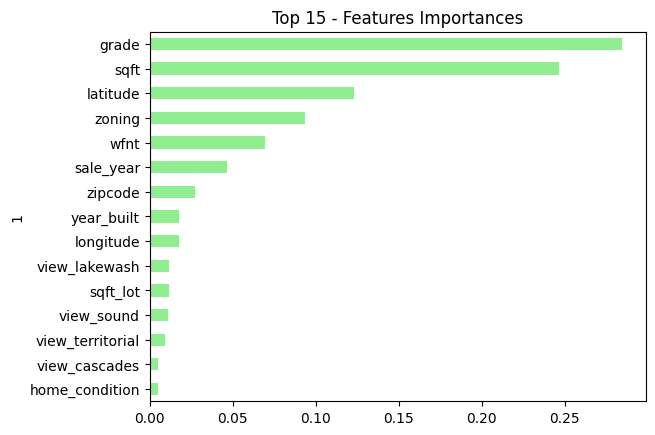

In [240]:
# Visualize the features by importance

importances_df = pd.DataFrame(sorted(zip(gb_model.feature_importances_, X.columns), reverse=True))
importances_df = importances_df.head(15)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Top 15 - Features Importances', legend=False)



#Survey from audience - not working

Use single row populate with mean average from dataset.
Then replace specific values with input from audience to generate new predicted price.

In [245]:
X_survey = X_test
s_row = {'latitude': 47.625,	'longitude':-122.337,	'zoning': 1, 'year_built':1942,	'sqft_lot':5853, 'sqft':1909,	'grade':7.34,	'fbsmt_grade':4.146,	'home_condition':3.751,	'stories':1,'beds':3,'bath_full':1,
           'bath_3qtr':0.5,'bath_half':1,'garb_sqft':82.265,'gara_sqft':62.40,'wfnt':0.05,'golf':0.002,'greenbelt':0,'noise_traffic': 0.1,'view_rainier':0.01,'view_olympics':0.01,'view_cascades':0.01,'view_territorial':0.01,
           'view_skyline':0.01,'view_sound':0.01,'view_lakewash':0.01,'view_otherwater':0.01,'sale_year':2020,'zipcode':98119,'sale_month':6,'sale_day':28}

s_row_df = pd.DataFrame([s_row])
X_survey = pd.concat([X_survey, s_row_df], ignore_index=True)

X_survey


,latitude,longitude,zoning,year_built,sqft_lot,sqft,grade,fbsmt_grade,home_condition,stories,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
0,47.72,-122.36,2,1948,8160,1160,7.00,0.00,4.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2021,98177,7,9
1,47.54,-122.36,1,1964,6960,1520,7.00,0.00,4.00,1.50,...,0.00,0.00,0.00,0.00,0.00,0.00,2020,98106,7,20
2,47.69,-122.37,4,1930,4400,1900,7.00,7.00,5.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2019,98117,9,12
3,47.58,-122.31,1,1919,4000,1490,6.00,6.00,4.00,1.50,...,0.00,2.00,0.00,0.00,0.00,0.00,2022,98144,2,7
4,47.69,-122.35,1,1931,4200,1300,8.00,0.00,3.00,1.50,...,0.00,0.00,0.00,0.00,0.00,0.00,2019,98103,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,47.58,-122.39,1,1910,2354,1500,7.00,7.00,5.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2018,98116,12,12
4971,47.72,-122.37,6,1948,17550,1840,7.00,7.00,4.00,1.00,...,0.00,2.00,0.00,0.00,0.00,0.00,2021,98177,8,11
4972,47.50,-122.26,2,1940,7026,1015,6.00,0.00,3.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2020,98178,6,12
4973,47.73,-122.36,6,1962,9608,2890,9.00,9.00,4.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2018,98177,6,11


In [246]:
# Row index of the row you want to modify
row_index = 4974

s_sqft = 2500
s_stories = 2
s_beds = 4
s_baths = 2
s_zipcode = 98117

# Replace specific values in the specified row
X_survey['sqft'] = X_survey['sqft'].replace([1909],[s_sqft])
X_survey['stories'] = X_survey['stories'].replace([1], [s_stories])
X_survey['beds'] = X_survey['beds'].replace([3], [s_beds])
X_survey['bath_full'] = X_survey['bath_full'].replace([1], [s_baths])
X_survey['zipcode'] = X_survey['zipcode'].replace([98119], [s_zipcode])


X_survey

,latitude,longitude,zoning,year_built,sqft_lot,sqft,grade,fbsmt_grade,home_condition,stories,...,view_cascades,view_territorial,view_skyline,view_sound,view_lakewash,view_otherwater,sale_year,zipcode,sale_month,sale_day
0,47.72,-122.36,2,1948,8160,1160,7.00,0.00,4.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2021,98177,7,9
1,47.54,-122.36,1,1964,6960,1520,7.00,0.00,4.00,1.50,...,0.00,0.00,0.00,0.00,0.00,0.00,2020,98106,7,20
2,47.69,-122.37,4,1930,4400,1900,7.00,7.00,5.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2019,98117,9,12
3,47.58,-122.31,1,1919,4000,1490,6.00,6.00,4.00,1.50,...,0.00,2.00,0.00,0.00,0.00,0.00,2022,98144,2,7
4,47.69,-122.35,1,1931,4200,1300,8.00,0.00,3.00,1.50,...,0.00,0.00,0.00,0.00,0.00,0.00,2019,98103,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,47.58,-122.39,1,1910,2354,1500,7.00,7.00,5.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2018,98116,12,12
4971,47.72,-122.37,6,1948,17550,1840,7.00,7.00,4.00,2.00,...,0.00,2.00,0.00,0.00,0.00,0.00,2021,98177,8,11
4972,47.50,-122.26,2,1940,7026,1015,6.00,0.00,3.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2020,98178,6,12
4973,47.73,-122.36,6,1962,9608,2890,9.00,9.00,4.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2018,98177,6,11


In [247]:
# scaler = StandardScaler()

# # scale data
# X_scaler = scaler.fit(X_survey)
# X_survey_scaled = X_scaler.transform(X_survey)

# # predict prices
# y_pred = gb_model.predict(X_survey_scaled)

# #format numbers with 2 decimals places
# pd.options.display.float_format = '{:.2f}'.format


# mse = mean_squared_error(y_test, y_pred)
# rmse = round(np.sqrt(mse),2)
# r2 = r2_score(y_test, y_pred)

# absolute_diff = np.abs(y_test - y_pred)

# #Create a DataFrame for comparison
# comparison_df = pd.DataFrame({
#     'Actual Price': y_test,
#     'Predicted Price': y_pred,
#     'Absolute Difference': absolute_diff
# })

# # Print the comparison DataFrame
# print(comparison_df)
# print("Root Mean Squared Error:", rmse)
# print("R-squared:", r2)

ValueError: ignored